In [1]:
import pandas as pd
from sqlalchemy import create_engine
import urllib


In [6]:
import pandas as pd

# נתיב לקובץ
file_path = r'C:\GamingBIP\Excel\RawData.csv'

# קריאה מה-CSV
df = pd.read_csv(file_path)

# הצגה של 5 שורות ראשונות
df.head()


,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,Year
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,9/17/2013,NaN,2013.0
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,11/18/2014,2018-01-03,2014.0
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,10/28/2002,NaN,2002.0
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,9/17/2013,NaN,2013.0
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,11/6/2015,2018-01-14,2015.0


In [7]:
# המרה לעמודת תאריך
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# יצירת עמודת שנה
df['Year'] = df['release_date'].dt.year

# בדיקה
df[['release_date', 'Year']].head()


,release_date,Year
0,2013-09-17,2013.0
1,2014-11-18,2014.0
2,2002-10-28,2002.0
3,2013-09-17,2013.0
4,2015-11-06,2015.0


In [8]:
from sqlalchemy import create_engine
import urllib

# הגדרת פרטי החיבור לפי השרת שלך
params = urllib.parse.quote_plus(
    "Driver={ODBC Driver 17 for SQL Server};"
    "Server=DESKTOP-5C8R695\\SQLSERVER2019_17;"
    "Database=GamingBI;"
    "Trusted_Connection=yes;"
)

# יצירת engine
engine = create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)

# טעינת הנתונים לטבלה בשם Games (ימחוק אם כבר קיימת)
df.to_sql("Games", engine, if_exists='replace', index=False)

print("✅ הנתונים הועלו בהצלחה ל-SQL Server!")


InterfaceError: (pyodbc.InterfaceError) ('28000', '[28000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Login failed for user \'DESKTOP-5C8R695\\ebtom\'. (18456) (SQLDriverConnect); [28000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Cannot open database "GamingBI" requested by the login. The login failed. (4060); [28000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Login failed for user \'DESKTOP-5C8R695\\ebtom\'. (18456); [28000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Cannot open database "GamingBI" requested by the login. The login failed. (4060)')
(Background on this error at: https://sqlalche.me/e/20/rvf5)

In [9]:
from sqlalchemy import create_engine
import urllib

# הגדרת פרטי החיבור לפי השרת שלך
params = urllib.parse.quote_plus(
    "Driver={ODBC Driver 17 for SQL Server};"
    "Server=DESKTOP-5C8R695\\SQLSERVER2019_17;"
    "Database=GamingBIp;"
    "Trusted_Connection=yes;"
)

# יצירת engine
engine = create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)

# טעינת הנתונים לטבלה בשם Games (ימחוק אם כבר קיימת)
df.to_sql("Games", engine, if_exists='replace', index=False)

print("✅ הנתונים הועלו בהצלחה ל-SQL Server!")


✅ הנתונים הועלו בהצלחה ל-SQL Server!


In [10]:
pip install matplotlib seaborn


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/a6/b6/a9405484fb40746fdc6ae4502b16a9d6e53282ba5baaf9ebe2da579f68c4/matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/01/c8/fadd0b92ffa7b5eb5949bf340a63a4a496a6930a6c37a7ba0f12acb076d6/contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/06/5d/1be5424bb305880e1113631f49a55ea7c7da3a5fe02608ca7c16a0


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\ebtom\AppData\Local\Temp\ipykernel_29272\1151178279.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='total_sales', data=sales_by_year, palette='viridis')


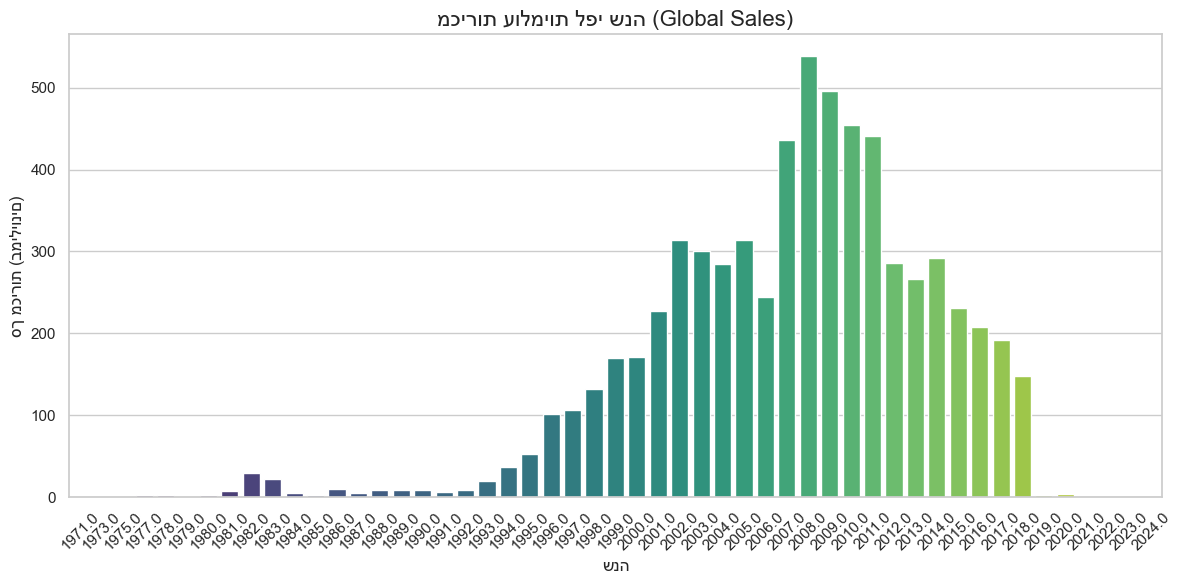

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# הגדרה של סגנון גרפי
sns.set(style="whitegrid")

# סינון רק לשורות עם שנת יציאה תקינה
df_clean = df[df['Year'].notnull()]

# קיבוץ לפי שנה וסכימת המכירות
sales_by_year = df_clean.groupby('Year')['total_sales'].sum().reset_index()

# גרף עמודות
plt.figure(figsize=(12,6))
sns.barplot(x='Year', y='total_sales', data=sales_by_year, palette='viridis')

plt.title('מכירות עולמיות לפי שנה (Global Sales)', fontsize=16)
plt.xlabel('שנה')
plt.ylabel('סך מכירות (במיליונים)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\ebtom\AppData\Local\Temp\ipykernel_29272\4270046998.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='genre', data=genre_sales, palette='magma')


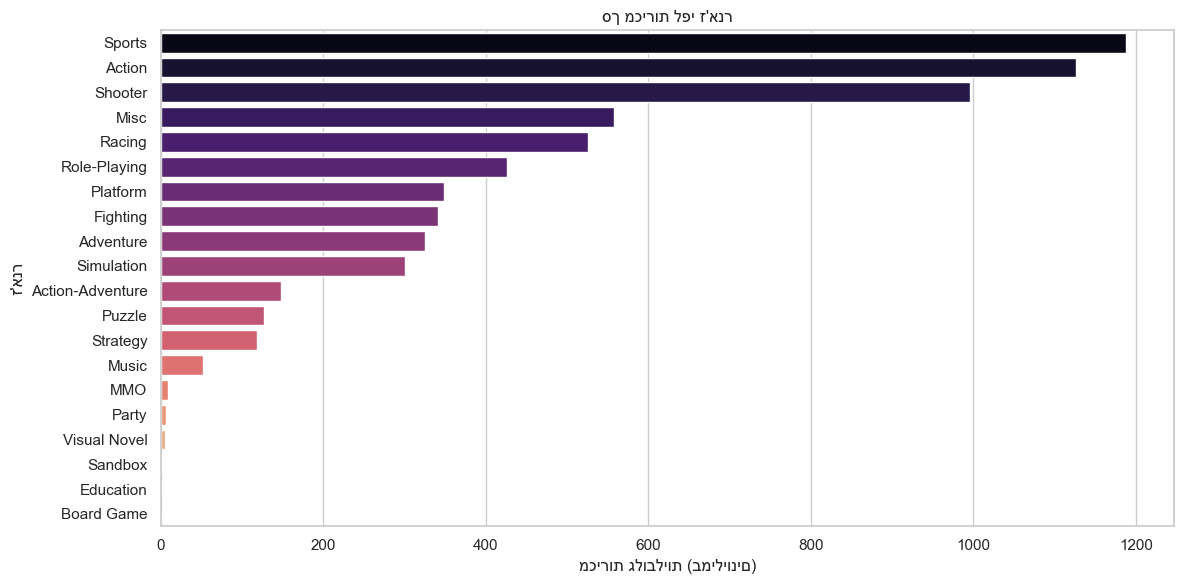

In [12]:
# סכום מכירות לפי ז’אנר
genre_sales = df.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='total_sales', y='genre', data=genre_sales, palette='magma')
plt.title('סך מכירות לפי ז\'אנר')
plt.xlabel('מכירות גלובליות (במיליונים)')
plt.ylabel('ז\'אנר')
plt.tight_layout()
plt.show()


C:\Users\ebtom\AppData\Local\Temp\ipykernel_29272\3655123704.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='console', data=platform_sales, palette='cubehelix')


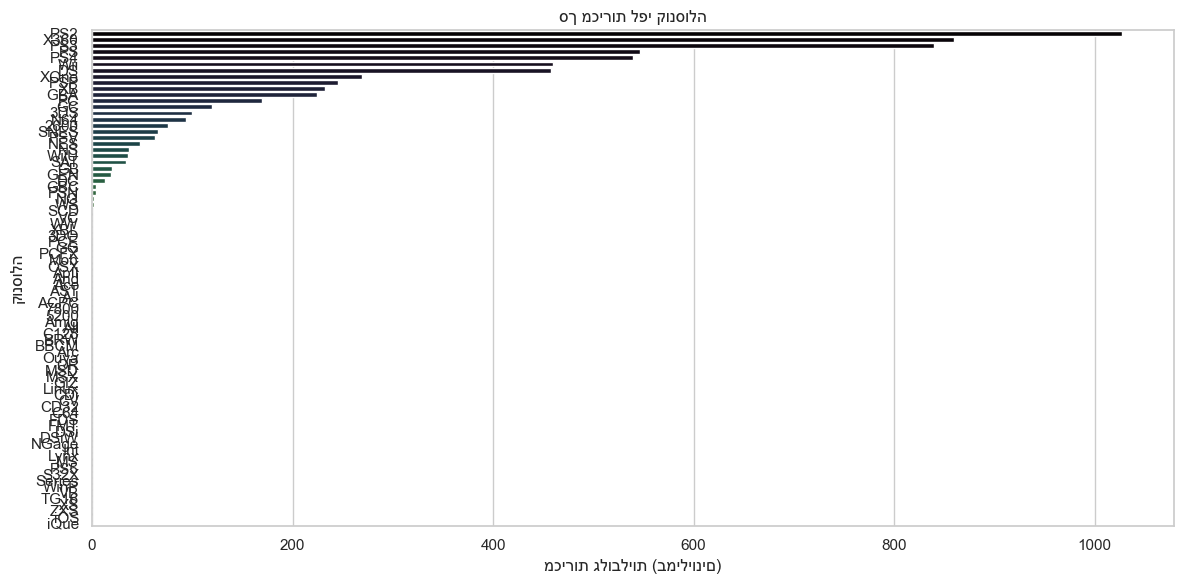

In [13]:
# קיבוץ לפי קונסולה (console) וסכימת מכירות
platform_sales = df.groupby('console')['total_sales'].sum().reset_index()

# מיון לפי מכירות מהגבוה לנמוך
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)

# גרף
plt.figure(figsize=(12,6))
sns.barplot(x='total_sales', y='console', data=platform_sales, palette='cubehelix')

plt.title('סך מכירות לפי קונסולה')
plt.xlabel('מכירות גלובליות (במיליונים)')
plt.ylabel('קונסולה')
plt.tight_layout()
plt.show()


In [14]:
top_platforms = platform_sales.head(20)


C:\Users\ebtom\AppData\Local\Temp\ipykernel_29272\3404218262.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='console', data=top_platforms, palette='crest')


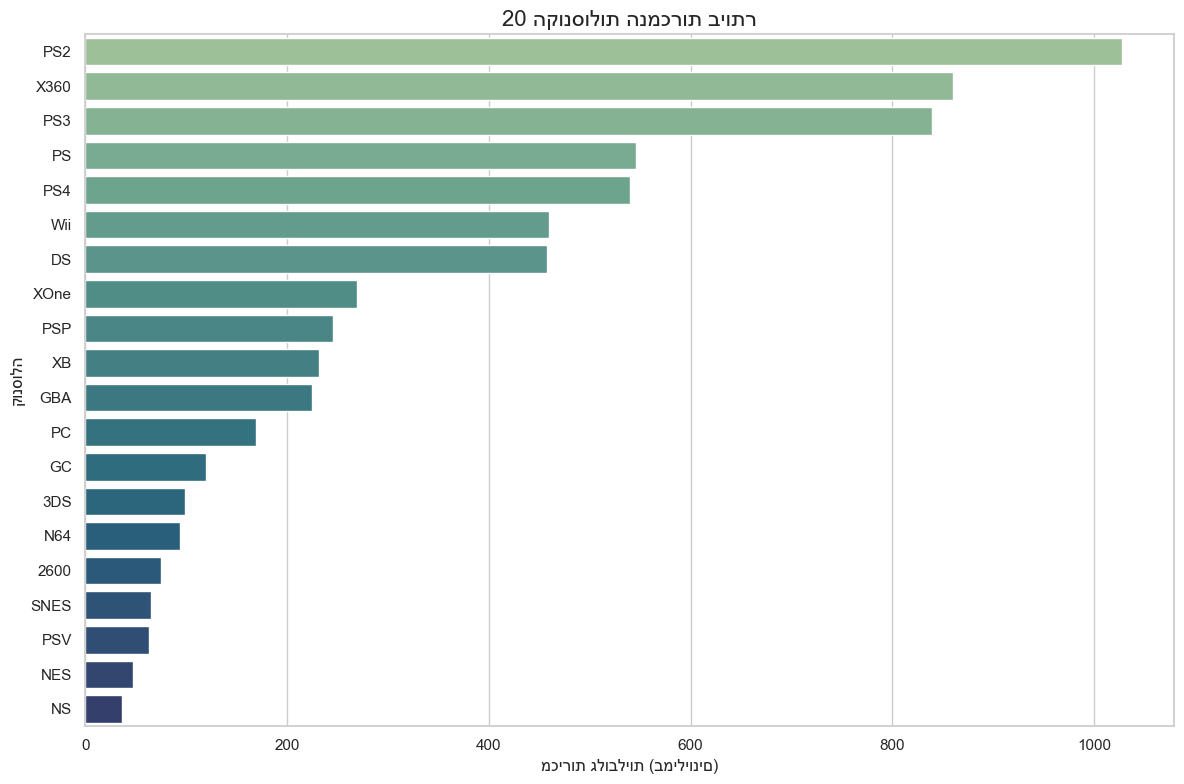

In [15]:
plt.figure(figsize=(12,8))
sns.barplot(x='total_sales', y='console', data=top_platforms, palette='crest')

plt.title('20 הקונסולות הנמכרות ביותר', fontsize=16)
plt.xlabel('מכירות גלובליות (במיליונים)')
plt.ylabel('קונסולה')
plt.tight_layout()
plt.show()
